In [4]:
#Import modules
import numpy as np
import pandas as pd
import os.path
from pylab import *
import glob
import os
import re
from xlwt import Workbook
from scipy.optimize import curve_fit



from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model, Parameter, Parameters

import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
!python ratio_notebook.py
%run ratio_notebook.py

In [54]:
parentdir = os.getcwd()
#os.chdir('20160910_CuAzu655Ferri_asc_2ndtime')
#os.chdir('Analysis_Sebby_March_2017')
#os.chdir('..')
print(parentdir)

C:\Users\Sebby\Desktop\TT_Analyse_Sebby\Analysis_Sebby_March_2017


The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist
The file Point_A3_050mV(12)_60.5__30s_19.pt3.datn.em.plot does not exist
The (average) midpoint potential is according to timetrace/FCS: 0.00285249335642
using 10 different points
The (average) midpoint potential is according to FCS: 0.0356524605458
using 10 different points


()

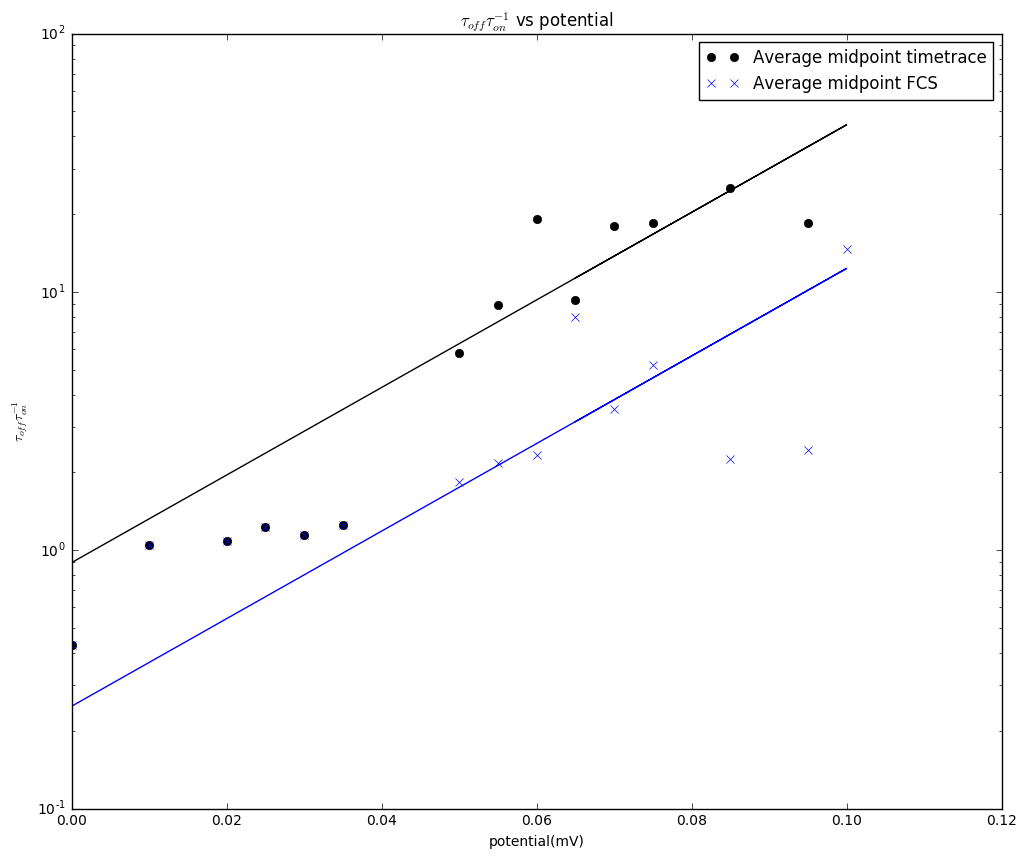

In [55]:
#************* t_on t_off^(-1) vs potential********************

pointnumbers = 35 #Change this to the minimal amount of points
pot = 15 #number of potentials
current_dir = 'S101d16Feb17_60.5_635_A3_CuAzu655' #foldername you want to work in.
protein_amount = 24 #number of proteins you want to be plotted (will plot the first x proteins)
#interested_protein_numbers = [0, 3, 8, 10, 11] #prot nr - 1
interested_protein_numbers = [0, 3, 8, 10, 11]
savename_file = 't_ratio_14Feb17.xls'
save_fig_name = 'bla.png'
minimal_pot = 40 #potential till timetrace t_on and t_off is sufficient. Potentials below this value = FCS
tminFCS = 0
tmaxFCS = 10000
minimal_points = 4 #minimal points of a given point to calculate the midpoint potential. Example:
#some protein were only active in 2 potentials. to filter these out, set a minimal amount of active potentials here.
t_ratio_notebook(pot, pointnumbers, current_dir, protein_amount, interested_protein_numbers, savename_file, save_fig_name, minimal_pot, tminFCS, tmaxFCS, minimal_points)

[ 0.00256155]
[ 0.00084238]


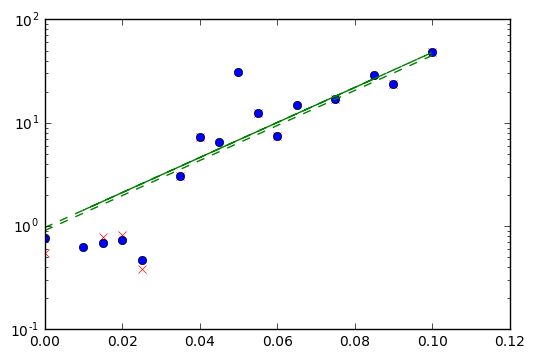

[ 0.00256155]
[ 0.00084238]


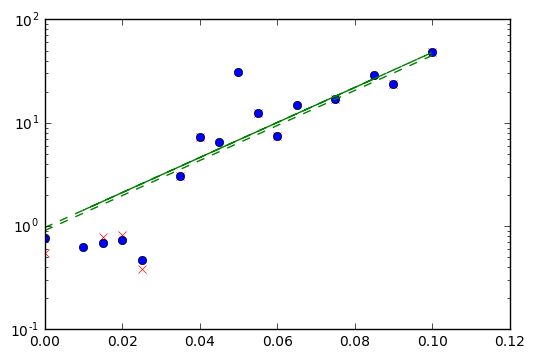

In [35]:
y_1 = [48.62951582331873, 23.904438776736455, 17.06620729364577, 7.5062066865097234, 12.536809680664424, 7.3409946000581145, 3.0493269466865054, 0.38173578812120001, 0.82946268632500009, 0.77861653017683341, 0.55526126763650008]
x_1 = [0.1, 0.09, 0.075, 0.06, 0.055, 0.04, 0.035, 0.025, 0.02, 0.015, 0]

y_2 = [0.7701837956762458, 0.6806879605521884, 0.7298681478069913, 0.4665120868638997, 3.0493269466865054, 7.3409946000581145, 30.81616944800298, 12.536809680664424, 7.5062066865097234, 17.06620729364577, 23.904438776736455, 48.62951582331873, 0.6328104286834932, 6.528531815223261, 14.815773477517531, 28.704428326174998]
x_2 = [0.0, 0.015, 0.02, 0.025, 0.035, 0.04, 0.05, 0.055, 0.06, 0.075, 0.09, 0.1, 0.01, 0.045, 0.065, 0.085]

plt.plot(x_1,y_1, 'x', color = 'r')
plt.plot(x_2,y_2, 'o', color = 'b')


plt.yscale('log')

def nernst(x, a):
        return(10**((x - a) / 0.059))

popt_0, pcov_0 = curve_fit(nernst, x_1, y_1, p0 = 0.020, bounds = (0,np.inf))
popt_1, pcov_1 = curve_fit(nernst, x_2, y_2, p0 = 0.020, bounds = (0,np.inf))
plt.plot(x_1, nernst(x_1, *popt_0), 'g--') 
plt.plot(x_2, nernst(x_2, *popt_1), 'g--') 


print(popt_0)
print(popt_1)